# Task 1- Stock Prediction :

##### Take stock price of any company youwant and predicts its price by using LSTM.Use only Jupyter notebook code.

#### Importing important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

#### Load the Dataset

In [4]:
df=pd.read_csv("C:\\Users\\91726\\Downloads\\Tesla.csv - Tesla.csv.csv")

In [5]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [7]:
df.shape

(1692, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


#### Ploting the closing price of the stock to visualize the trend

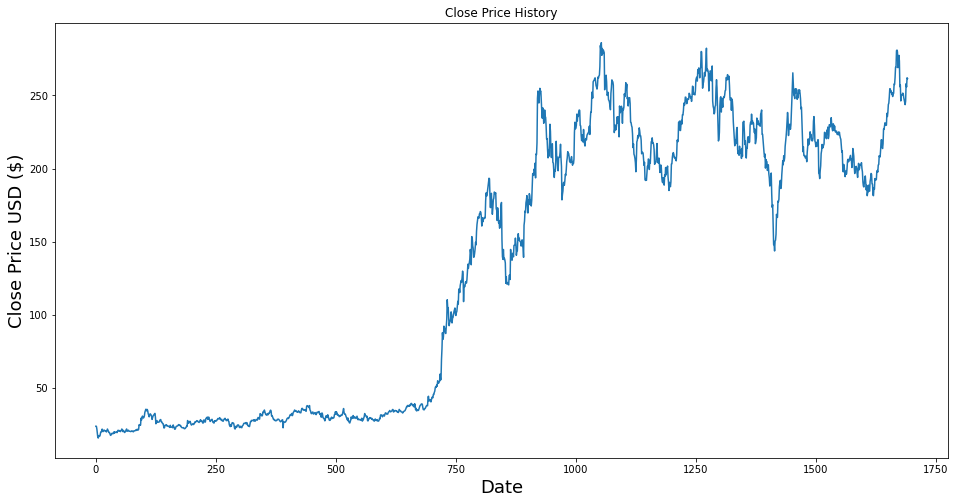

In [9]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

#### we need to preprocess the data before feeding it into the LSTM.

In [10]:
data = df.filter(['Close']).values

#### we will normalize the data between 0 and 1 using the MinMaxScaler:

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

#### To Train the Dataset

In [12]:
train_data = scaled_data[:int(len(scaled_data)*0.8)]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Build the LSTM model

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
41/41 [==============================] - 21s 89ms/step - loss: 0.0260
Epoch 2/50
41/41 [==============================] - 4s 87ms/step - loss: 0.0040
Epoch 3/50
41/41 [==============================] - 4s 90ms/step - loss: 0.0040
Epoch 4/50
41/41 [==============================] - 4s 88ms/step - loss: 0.0040
Epoch 5/50
41/41 [==============================] - 3s 83ms/step - loss: 0.0041
Epoch 6/50
41/41 [==============================] - 4s 89ms/step - loss: 0.0036
Epoch 7/50
41/41 [==============================] - 4s 91ms/step - loss: 0.0039
Epoch 8/50
41/41 [==============================] - 4s 94ms/step - loss: 0.0032
Epoch 9/50
41/41 [==============================] - 4s 97ms/step - loss: 0.0036
Epoch 10/50
41/41 [==============================] - 4s 95ms/step - loss: 0.0033
Epoch 11/50
41/41 [==============================] - 4s 93ms/step - loss: 0.0031
Epoch 12/50
41/41 [==============================] - 4s 92ms/step - loss: 0.0035
Epoch 13/50
41/41 [=================

#### predictions on the test data

In [14]:
test_data = scaled_data[int(len(scaled_data)*0.8) - 60:]
x_test = []
y_test = data[int(len(data)*0.8):, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 7s 33ms/step


#### Visualizing the Predicted price as compared to Actual price

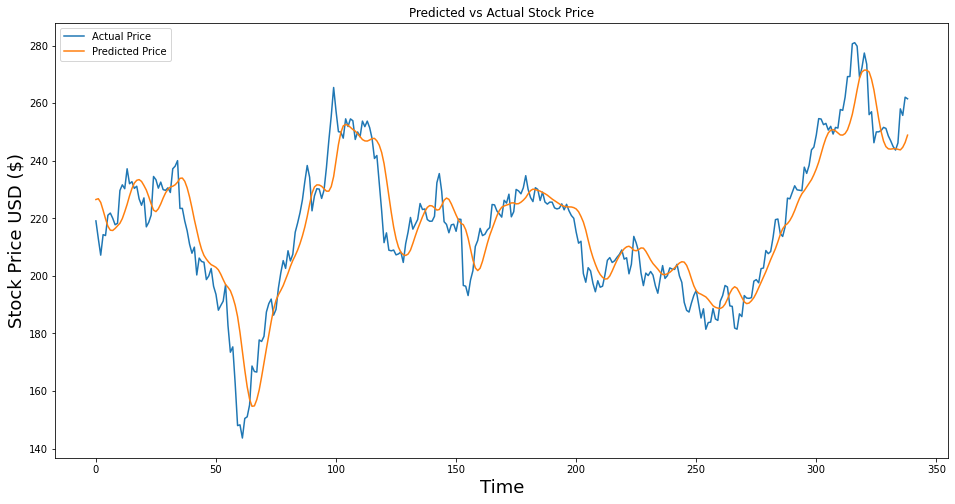

In [15]:
plt.figure(figsize=(16,8))
plt.title('Predicted vs Actual Stock Price')
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Stock Price USD ($)', fontsize=18)
plt.legend()
plt.show()

### Thank You